In [1]:
!pip install deap
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 12.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.3 MB/s eta 0:00:00


**Dataset:** https://archive.ics.uci.edu/ml/datasets/parkinsons

**Algorithm:** SVM 

In [2]:
import numpy as np
from pandas import read_csv

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'

data = read_csv(url)

data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
data.drop('name',axis=1, inplace=True)


In [5]:
#taget 
y=data['status']
#features 
X=data.drop('status',axis=1)

In [6]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [7]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [8]:
from sklearn import model_selection
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

In [22]:
svm_classifier = svm.SVC(probability=True)
cv_results = model_selection.cross_val_score(svm_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[SVM] mean: ',cv_results.mean())

[SVM] mean:  0.8012499999999999


In [24]:
dt_classifier = DecisionTreeClassifier()
cv_results = model_selection.cross_val_score(dt_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[DT] mean: ',cv_results.mean())

[DT] mean:  0.8904166666666666


In [26]:
knn_classifier = KNeighborsClassifier()
cv_results = model_selection.cross_val_score(knn_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[KNN] mean: ',cv_results.mean())

[KNN] mean:  0.8587499999999999


In [12]:
gb_classifier = GradientBoostingClassifier()
cv_results = model_selection.cross_val_score(gb_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[GB] mean: ',cv_results.mean())

[GB] mean:  0.9037499999999999


In [13]:
from sklearn.metrics import roc_curve, auc

def get_mean_AUC(y_test, y_scores):
  # Compute ROC curve and AUC for each class
  n_classes = y_scores.shape[1]
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  # Aggregate the results
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
  mean_tpr /= n_classes
  roc_auc_macro = auc(all_fpr, mean_tpr)

  return all_fpr, mean_tpr, roc_auc_macro

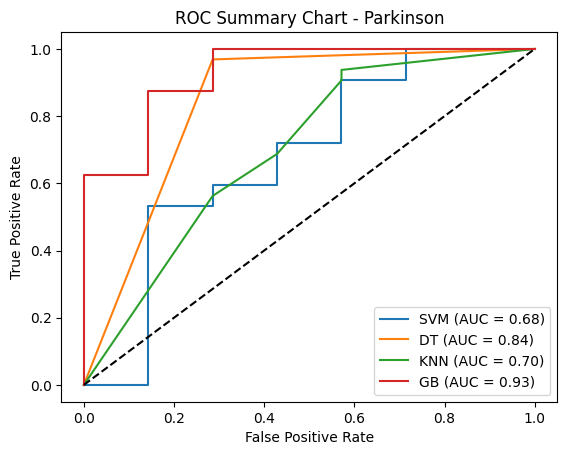

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

svm_classifier.fit(X_train,y_train)
dt_classifier.fit(X_train,y_train)
knn_classifier.fit(X_train,y_train)
gb_classifier.fit(X_train,y_train)

# Now you have the true labels and predicted probabilities/scores
y_true = y_test  # True labels from the test data


# Make predictions using your trained model
y_pred1 = svm_classifier.predict_proba(X_test)[::,1]
fpr1, tpr1, thresholds1 = roc_curve(y_true, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

# Make predictions using your trained model
y_pred2 = dt_classifier.predict_proba(X_test)[::,1]
fpr2, tpr2, thresholds2 = roc_curve(y_true, y_pred2)
roc_auc2 = auc(fpr2, tpr2)

# Make predictions using your trained model
y_pred3 = knn_classifier.predict_proba(X_test)[::,1] 
fpr3, tpr3, thresholds3 = roc_curve(y_true, y_pred3)
roc_auc3 = auc(fpr3, tpr3)

# Make predictions using your trained model
y_pred4 = gb_classifier.predict_proba(X_test)[::,1] 
fpr4, tpr4, thresholds3 = roc_curve(y_true, y_pred4)
roc_auc4 = auc(fpr4, tpr4)

# Plotting the ROC curve
plt.plot(fpr1, tpr1, label='SVM (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='DT (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='KNN (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='GB (AUC = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Summary Chart - Parkinson')
plt.legend(loc='lower right')
plt.show()

In [33]:
y_pred1

array([0.83545026, 0.79049028, 0.83221636, 0.78956422, 0.84842461,
       0.84248238, 0.83235504, 0.85625974, 0.47374661, 0.41663077,
       0.86988175, 0.85203265, 0.81275194, 0.82065631, 0.84709337,
       0.66188981, 0.84551086, 0.44340438, 0.82259063, 0.69621502,
       0.8199624 , 0.55431298, 0.8495061 , 0.14694855, 0.8508959 ,
       0.66786686, 0.85363489, 0.84394308, 0.5074433 , 0.85303446,
       0.64838069, 0.82437122, 0.8393734 , 0.81348903, 0.84016429,
       0.18674926, 0.80174506, 0.7747639 , 0.5764762 ])